In [19]:
import pandas as pd 
import numpy as np
import scipy as stats
import matplotlib.pyplot as plt


In [20]:
df = pd.read_csv('EZ_500_recoverd_param_lerch_voss_mean_median.csv')

In [21]:
df.insert(3, "v_total = v2 - v1", df['v1_mean']-df['v2_mean'], True)


In [22]:
df.insert(4, "v_bias = v2 + v1", df['v1_mean']+df['v2_mean'], True)


In [23]:
#df.to_csv('with_total_bias_recoverd_param_lerch_voss_mean_median.csv',index=False)


In [24]:
df

,Experiment,v1_mean,v2_mean,v_total = v2 - v1,v_bias = v2 + v1,a_mean,ndt_mean,alpha_mean,v1_median,v2_median,a_median,ndt_median,alpha_median
0,3024_class_words_part_1.dat,2.618686,-1.782665,4.401351,0.836020,1.240104,0.482941,1.831886,2.616068,-1.780664,1.238501,0.483537,1.837653
1,1025_class_words_part_2.dat,3.971762,-3.301207,7.272969,0.670555,0.986329,0.444981,1.864223,3.980259,-3.298341,0.982895,0.445491,1.866721
2,1011_class_pictures_part_1.dat,0.804880,-1.662099,2.466980,-0.857219,0.795498,0.607122,1.431124,0.796424,-1.653777,0.792364,0.607514,1.425350
3,017_class_pictures_part_1.dat,2.434124,-3.693056,6.127180,-1.258932,1.545200,0.548999,1.769264,2.428750,-3.683310,1.522247,0.552525,1.773668
4,1004_class_pictures_part_1.dat,1.621121,-1.817173,3.438294,-0.196053,1.338228,0.586937,1.924027,1.622200,-1.817812,1.338929,0.587878,1.938917
...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,2005_class_pictures_part_1.dat,1.992791,-2.284823,4.277614,-0.292032,1.385653,0.610757,1.926841,1.987733,-2.286048,1.382493,0.611742,1.933964
410,1023_class_pictures_part_1.dat,3.571176,-3.871048,7.442224,-0.299872,1.794586,0.554921,1.769139,3.574770,-3.875438,1.743057,0.559520,1.777616
411,4012_class_pictures_part_1.dat,1.789776,-2.067746,3.857523,-0.277970,1.262450,0.494430,1.875080,1.784172,-2.067688,1.261329,0.495336,1.883895
412,4012_class_pictures_part_2.dat,2.095854,-2.557569,4.653423,-0.461715,1.035231,0.460050,1.625458,2.100749,-2.542449,1.037780,0.461120,1.627029


In [7]:
#consider one task in two session 
df_word_part_1 = df[df['Experiment'].str.contains('class_words_part_1.')]
df_word_part_2 = df[df['Experiment'].str.contains('class_words_part_2.')]
df_word_part_2

,Experiment,v1_mean,v2_mean,v_total = v2 - v1,v_bias = v2 + v1,a_mean,ndt_mean,alpha_mean,v1_median,v2_median,a_median,ndt_median,alpha_median
1,1025_class_words_part_2.dat,3.971762,-3.301207,7.272969,0.670555,0.986329,0.444981,1.864223,3.980259,-3.298341,0.982895,0.445491,1.866721
5,1018_class_words_part_2.dat,3.451639,-3.643036,7.094675,-0.191396,1.169452,0.393872,1.823471,3.458070,-3.647354,1.163927,0.394822,1.831594
9,015_class_words_part_2.dat,3.492255,-3.025548,6.517803,0.466707,2.149008,0.317858,1.349420,3.486791,-3.017860,2.150056,0.318906,1.353831
11,3010_class_words_part_2.dat,2.268023,-2.088579,4.356603,0.179444,1.212952,0.466481,1.667483,2.267295,-2.088680,1.212289,0.467466,1.669803
16,4003_class_words_part_2.dat,2.549907,-2.323110,4.873017,0.226796,1.401507,0.440424,1.927860,2.547300,-2.319558,1.395639,0.441050,1.931996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,4008_class_words_part_2.dat,2.154008,-2.347188,4.501195,-0.193180,1.084294,0.437528,1.612053,2.150047,-2.344636,1.086835,0.438023,1.611678
392,011_class_words_part_2.dat,3.698284,-3.492721,7.191005,0.205563,1.208969,0.378576,1.700626,3.701698,-3.488225,1.202199,0.379406,1.703486
398,1001_class_words_part_2.dat,3.170643,-2.677165,5.847808,0.493478,1.654627,0.332001,1.640288,3.177109,-2.676860,1.645960,0.333203,1.641101
403,019_class_words_part_2.dat,1.907447,-1.714154,3.621601,0.193293,1.235058,0.387410,1.882926,1.908073,-1.714428,1.239202,0.388104,1.886800


In [8]:
df_word_part_1=df_word_part_1.sort_values('Experiment')

In [9]:
df_word_part_2=df_word_part_2.sort_values('Experiment')

In [10]:
from scipy.stats.stats import pearsonr
pearsonr(np.array(df_word_part_1['a_mean']),np.array(df_word_part_1['v1_mean']))

/tmp/ipykernel_47375/2051268568.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=0.056878602090971994, pvalue=0.5663033695362232)

In [11]:
from scipy.stats import pearsonr
import pandas as pd

def calculate_corr(df):
    dfcols = pd.DataFrame(columns=df.columns)
    corr = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            corr[r][c] = round(pearsonr(tmp[r], tmp[c])[0], 4)
    return corr

In [12]:
disti=df_word_part_1.drop(columns=['Experiment'])

In [13]:
calculate_corr(disti)

,v1_mean,v2_mean,v_total = v2 - v1,v_bias = v2 + v1,a_mean,ndt_mean,alpha_mean,v1_median,v2_median,a_median,ndt_median,alpha_median
v1_mean,1.0,-0.6429,0.8878,0.2431,0.0569,0.0267,0.2048,1.0,-0.6434,0.053,0.0294,0.2061
v2_mean,-0.6429,1.0,-0.9233,0.5867,-0.1352,0.1839,-0.0605,-0.643,1.0,-0.1321,0.1802,-0.0616
v_total = v2 - v1,0.8878,-0.9233,1.0,-0.2306,0.1098,-0.0971,0.139,0.8879,-0.9235,0.106,-0.0935,0.1404
v_bias = v2 + v1,0.2431,0.5867,-0.2306,1.0,-0.1111,0.2611,0.1398,0.2429,0.5861,-0.1112,0.2592,0.1398
a_mean,0.0569,-0.1352,0.1098,-0.1111,1.0,-0.1301,0.2605,0.057,-0.1365,0.9999,-0.1237,0.2606
ndt_mean,0.0267,0.1839,-0.0971,0.2611,-0.1301,1.0,0.6441,0.0257,0.1827,-0.1327,1.0,0.6441
alpha_mean,0.2048,-0.0605,0.139,0.1398,0.2605,0.6441,1.0,0.2044,-0.0616,0.2583,0.6467,0.9999
v1_median,1.0,-0.643,0.8879,0.2429,0.057,0.0257,0.2044,1.0,-0.6435,0.0532,0.0283,0.2058
v2_median,-0.6434,1.0,-0.9235,0.5861,-0.1365,0.1827,-0.0616,-0.6435,1.0,-0.1333,0.179,-0.0627
a_median,0.053,-0.1321,0.106,-0.1112,0.9999,-0.1327,0.2583,0.0532,-0.1333,1.0,-0.1263,0.2584


In [14]:
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df):
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            pvalues[r][c] = round(pearsonr(tmp[r], tmp[c])[1], 4)
    return pvalues

In [15]:
calculate_pvalues(disti)

,v1_mean,v2_mean,v_total = v2 - v1,v_bias = v2 + v1,a_mean,ndt_mean,alpha_mean,v1_median,v2_median,a_median,ndt_median,alpha_median
v1_mean,0.0,0.0,0.0,0.0129,0.5663,0.7879,0.0371,0.0,0.0,0.5928,0.7673,0.0358
v2_mean,0.0,0.0,0.0,0.0,0.171,0.0617,0.5418,0.0,0.0,0.1814,0.0672,0.5342
v_total = v2 - v1,0.0,0.0,0.0,0.0185,0.2672,0.3269,0.1592,0.0,0.0,0.2844,0.345,0.1551
v_bias = v2 + v1,0.0129,0.0,0.0185,0.0,0.2613,0.0074,0.1568,0.013,0.0,0.2612,0.0079,0.1568
a_mean,0.5663,0.171,0.2672,0.2613,0.0,0.1881,0.0076,0.5658,0.1671,0.0,0.2111,0.0075
ndt_mean,0.7879,0.0617,0.3269,0.0074,0.1881,0.0,0.0,0.796,0.0634,0.1793,0.0,0.0
alpha_mean,0.0371,0.5418,0.1592,0.1568,0.0076,0.0,0.0,0.0374,0.5348,0.0081,0.0,0.0
v1_median,0.0,0.0,0.0,0.013,0.5658,0.796,0.0374,0.0,0.0,0.5919,0.7754,0.0361
v2_median,0.0,0.0,0.0,0.0,0.1671,0.0634,0.5348,0.0,0.0,0.1772,0.069,0.5271
a_median,0.5928,0.1814,0.2844,0.2612,0.0,0.1793,0.0081,0.5919,0.1772,0.0,0.2012,0.0081


# distict aspect of data

In [16]:
np.corrcoef(np.array(df_word_part_1['a_mean']),np.array(df_word_part_1['v1_mean']))

array([[1.       , 0.0568786],
       [0.0568786, 1.       ]])

In [17]:
df_word_part_1['a_mean'].corr(df_word_part_1['ndt_mean'])

-0.13008635970089025

In [18]:
calculate_pvalues() 


TypeError: calculate_pvalues() missing 1 required positional argument: 'df'

# ttest table

In [ ]:
data_1=df_word_part_1
data_2=df_word_part_2
import pingouin as pg

def ttest(data_1,data_2) :
    df = pd.DataFrame([])
    for column in data_1 :
        if column == "Experiment":
            continue
        x1, x2 = data_1[column], data_2[column]
        x1_mean = x1.mean()
        x1_std = x1.std()
        x2_mean = x2.mean()
        x2_std = x2.std()

        res = pg.ttest(x1, x2, paired=True)
        res.insert(loc=0, column='parameter', value=column)
        res.insert(loc=1,column='mean_s1',value=x1_mean)
        res.insert(loc=2,column='std_s1',value=x1_std)
        res.insert(loc=3,column='mean_s2',value=x2_mean)
        res.insert(loc=4,column='std_s2',value=x2_std)

        df = df.append(res)



    df = df.round(4)
    return(df)


In [ ]:
resses=ttest(df_word_part_1,df_word_part_2)
resses.to_excel("ttest_EZ_study1_s1s2_word.xlsx")
resses


In [ ]:
corr_frame = pd.DataFrame()
data = {'Experiment':df_word_part_1['Experiment'],'v1_mean_part_1':np.array(df_word_part_1['v1_mean']),'v1_mean_part_2':np.array(df_word_part_2['v1_mean'])}
#corr_frame = pd.DataFrame(data,columns=['v1_mean_part_1', 'v1_mean_part_2'])
#corr_frame['v1_mean_part_1']=df_word_part_1['v1_mean']
#data
corr_data = pd.DataFrame(data)

In [ ]:
corr_data

In [ ]:
import pandas as pd
import scipy.linalg as sp
import numpy as np
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

In [ ]:


df_x = corr_data[['v1_mean_part_1', 'v1_mean_part_2']]
df_x['mahala'] = mahalanobis(x=df_x, data=corr_data[['v1_mean_part_1', 'v1_mean_part_2']])
df_x

In [ ]:
# Critical values for two degrees of freedom
from scipy.stats import chi2
chi2.ppf((1-0.001), df=2)
#> 9.21

In [ ]:
df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Extreme values with a significance level of 0.01
df_without_outlier=df_x.loc[df_x.p_value < 0.001]

In [ ]:
df_without_outlier

In [ ]:
x = df_x['v1_mean_part_1']
y = df_x['v1_mean_part_2']

corr = np.corrcoef(x, y)
corr

In [ ]:
#plt.style.use('_mpl-gallery')

np.random.seed(3)
plt.plot(x, y, '.', color='black');

In [ ]:
for column in df_word_part_1:
    print (column)

In [ ]:
params_mean=['v1_mean','v2_mean','a_mean','ndt_mean','alpha_mean','v_total = v2 - v1','v_bias = v2 + v1']
#corr_frame = pd.DataFrame()
#corr_frame['Experiment']=df_word_part_1['Experiment']
final_corr_frame = pd.DataFrame()
final_corr_frame['Experiment']=['class_words']
final_corr_frame['corr_type']=['between session']

final_corr_dict = {}
from scipy.stats import chi2
chi2.ppf((1-0.001), df=2)

width=5
height=5
rows = 2
cols = 4
axes=[]
#fig=plt.figure()
a=0
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(10, 20))
axs = axs.flatten()
from scipy.stats.stats import pearsonr

for param in params_mean:
    corr_frame = pd.DataFrame()
    par_1='param_1_'+str(param)
    par_2='param_2_'+str(param)
    data_analysis = {'Experiment':df_word_part_1['Experiment'],par_1:np.array(df_word_part_1[param]),par_2:np.array(df_word_part_2[param])}
    corr_frame = pd.DataFrame(data_analysis)    
    df_x = corr_frame[[par_1, par_2]]
    df_x['mahala'] = mahalanobis(x=df_x, data=corr_frame[[par_1, par_2]])
    df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Extreme values with a significance level of 0.01
    df_outliers=df_x.loc[df_x.p_value < 0.001]
    ind=df_outliers.index
#drop the outliers with index     
    corr_without_outlier = corr_frame.drop(ind)
    x = corr_without_outlier[par_1]
    y = corr_without_outlier[par_2]
    #corr =  np.corrcoef(x, y)[0,1]
    #corr =round(corr,3)
    corrcoef_pval =pearsonr(x,y)
    corr = corrcoef_pval[0]
    corr =round(corr,3)
    pvalue=corrcoef_pval[1]
    pvalue =round(pvalue,5)
    #make significance by star ***
    if pvalue < 0.001 :
        corr = str(corr)+'***'
    elif pvalue < 0.01 :
        corr = str(corr)+'**'
    elif pvalue < 0.05 :
        corr = str(corr)+'*'
        
    print(param,corr,pvalue)
    print(ind)
  


    #plt.subplot(2,3)
    #plt.plot(x, y, '.', color='black')
    #axs[a].set_xlabel(param)
    axs[a].plot(x, y,'.')
    axs[a].set_title(param+'  corr='+str(corr))
    axs[a].set_xlabel('Session_1_word_class')
    axs[a].set_ylabel('Session_2_word_class')


    #ax.set_xlabel(param)
    #axs[a].set_xlabel(param)

    a+=1
    #plt.title('corr ='+str(corr))
    plt.xlabel('Session_1_word_class')
    plt.ylabel('Session_2_word_class')
    #plt.savefig("./{}.png".format(param))
    #plt.show()
    #f.savefig("./{}.png".format(param), dpi=600, bbox_inches='tight')
    fig.tight_layout()
    #f.savefig("./{}.png".format(param), dpi=600, bbox_inches='tight')



    
  
    final_corr_frame['corr_'+str(param)] = [corr]
fig.savefig("./EZ_Study1_word_s1s2_corr_.png", dpi=600, bbox_inches='tight')

#saving the results 

#final_corr_frame.to_csv('corr_between_session_word_class.csv',index=False)
 
    


In [ ]:
final_corr_frame.to_excel("EZ_between_s1s2_w.xlsx")
final_corr_frame

# class_pictures

In [25]:
#consider one task in two session 
df_class_pictures_1 = df[df['Experiment'].str.contains('class_pictures_part_1.')]
df_class_pictures_2 = df[df['Experiment'].str.contains('class_pictures_part_2.')]
df_class_pictures_2

,Experiment,v1_mean,v2_mean,v_total = v2 - v1,v_bias = v2 + v1,a_mean,ndt_mean,alpha_mean,v1_median,v2_median,a_median,ndt_median,alpha_median
6,1011_class_pictures_part_2.dat,1.075982,-1.418177,2.494158,-0.342195,0.813370,0.524171,1.698679,1.062396,-1.417107,0.821170,0.524645,1.709278
7,2001_class_pictures_part_2.dat,2.101405,-3.774969,5.876374,-1.673565,1.600781,0.503968,1.959476,2.102175,-3.761009,1.589452,0.505297,1.968114
8,1021_class_pictures_part_2.dat,4.568293,-4.493105,9.061397,0.075188,1.943209,0.486087,1.819222,4.619414,-4.535239,1.905469,0.489391,1.830611
13,4004_class_pictures_part_2.dat,1.779068,-2.457039,4.236106,-0.677971,0.874200,0.500635,1.487753,1.779747,-2.446748,0.875987,0.501505,1.489982
19,1020_class_pictures_part_2.dat,2.553474,-3.266643,5.820117,-0.713170,1.464447,0.527998,1.817911,2.545033,-3.260083,1.448002,0.530301,1.821608
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,3003_class_pictures_part_2.dat,2.296915,-2.930673,5.227588,-0.633758,1.296437,0.465884,1.767361,2.296287,-2.927855,1.288922,0.468093,1.771930
402,011_class_pictures_part_2.dat,3.242866,-3.661564,6.904430,-0.418698,1.179696,0.493409,1.789318,3.237441,-3.649125,1.162276,0.495195,1.795489
407,3017_class_pictures_part_2.dat,2.246283,-1.960216,4.206499,0.286068,0.842192,0.620584,1.532634,2.249759,-1.951804,0.841166,0.621289,1.534108
412,4012_class_pictures_part_2.dat,2.095854,-2.557569,4.653423,-0.461715,1.035231,0.460050,1.625458,2.100749,-2.542449,1.037780,0.461120,1.627029


In [26]:
df_class_pictures_1=df_class_pictures_1.sort_values('Experiment')
df_class_pictures_2=df_class_pictures_2.sort_values('Experiment')

In [27]:
from scipy.stats import pearsonr
import pandas as pd

def calculate_corr(df):
    dfcols = pd.DataFrame(columns=df.columns)
    corr = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            corr[r][c] = round(pearsonr(tmp[r], tmp[c])[0], 4)
    return corr

In [34]:
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalue(df):
    dfcols = pd.DataFrame(columns=df.columns)
    pvalue = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            pvalue[r][c] = round(pearsonr(tmp[r], tmp[c])[1], 4)
    return pvalue

In [37]:
disti=df_class_pictures_2.drop(columns=['Experiment'])

In [38]:
calculate_pvalue(disti)

,v1_mean,v2_mean,v_total = v2 - v1,v_bias = v2 + v1,a_mean,ndt_mean,alpha_mean,v1_median,v2_median,a_median,ndt_median,alpha_median
v1_mean,0.0,0.0,0.0,0.9335,0.0,0.2057,0.5554,0.0,0.0,0.0,0.2549,0.5692
v2_mean,0.0,0.0,0.0,0.0,0.0,0.4941,0.0082,0.0,0.0,0.0,0.587,0.0092
v_total = v2 - v1,0.0,0.0,0.0,0.0001,0.0,0.3194,0.0647,0.0,0.0,0.0,0.3939,0.0696
v_bias = v2 + v1,0.9335,0.0,0.0001,0.0,0.0012,0.6507,0.0006,0.9309,0.0,0.0016,0.603,0.0007
a_mean,0.0,0.0,0.0,0.0012,0.0,0.0107,0.003,0.0,0.0,0.0,0.0154,0.003
ndt_mean,0.2057,0.4941,0.3194,0.6507,0.0107,0.0,0.0,0.2098,0.4814,0.0089,0.0,0.0
alpha_mean,0.5554,0.0082,0.0647,0.0006,0.003,0.0,0.0,0.552,0.0088,0.0038,0.0,0.0
v1_median,0.0,0.0,0.0,0.9309,0.0,0.2098,0.552,0.0,0.0,0.0,0.2596,0.5655
v2_median,0.0,0.0,0.0,0.0,0.0,0.4814,0.0088,0.0,0.0,0.0,0.5729,0.0098
a_median,0.0,0.0,0.0,0.0016,0.0,0.0089,0.0038,0.0,0.0,0.0,0.0128,0.0038


In [39]:
calculate_corr(disti)

,v1_mean,v2_mean,v_total = v2 - v1,v_bias = v2 + v1,a_mean,ndt_mean,alpha_mean,v1_median,v2_median,a_median,ndt_median,alpha_median
v1_mean,1.0,-0.7669,0.923,0.0083,0.4724,-0.1257,0.0588,1.0,-0.768,0.4548,-0.1132,0.0567
v2_mean,-0.7669,1.0,-0.9548,0.6353,-0.567,0.0681,-0.2593,-0.7667,0.9999,-0.5487,0.0541,-0.2556
v_total = v2 - v1,0.923,-0.9548,1.0,-0.3771,0.5588,-0.0991,0.1827,0.9228,-0.9553,0.5397,-0.0849,0.1795
v_bias = v2 + v1,0.0083,0.6353,-0.3771,1.0,-0.315,-0.0451,-0.3332,0.0087,0.6339,-0.3078,-0.0519,-0.33
a_mean,0.4724,-0.567,0.5588,-0.315,1.0,-0.2506,0.2896,0.4729,-0.5669,0.9994,-0.2381,0.2894
ndt_mean,-0.1257,0.0681,-0.0991,-0.0451,-0.2506,1.0,0.5754,-0.1246,0.0701,-0.2565,0.9998,0.5766
alpha_mean,0.0588,-0.2593,0.1827,-0.3332,0.2896,0.5754,1.0,0.0593,-0.2569,0.2827,0.5807,0.9998
v1_median,1.0,-0.7667,0.9228,0.0087,0.4729,-0.1246,0.0593,1.0,-0.7678,0.4553,-0.1121,0.0573
v2_median,-0.768,0.9999,-0.9553,0.6339,-0.5669,0.0701,-0.2569,-0.7678,1.0,-0.5487,0.0562,-0.2533
a_median,0.4548,-0.5487,0.5397,-0.3078,0.9994,-0.2565,0.2827,0.4553,-0.5487,1.0,-0.2444,0.2827


# ttest Table

In [18]:
data_1=df_word_part_1
data_2=df_word_part_2
import pingouin as pg

def ttest(data_1,data_2) :
    df = pd.DataFrame([])
    for column in data_1 :
        if column == "Experiment":
            continue
        x1, x2 = data_1[column], data_2[column]
        x1_mean = x1.mean()
        x1_std = x1.std()
        x2_mean = x2.mean()
        x2_std = x2.std()

        res = pg.ttest(x1, x2, paired=True)
        res.insert(loc=0, column='parameter', value=column)
        res.insert(loc=1,column='mean_s1',value=x1_mean)
        res.insert(loc=2,column='std_s1',value=x1_std)
        res.insert(loc=3,column='mean_s2',value=x2_mean)
        res.insert(loc=4,column='std_s2',value=x2_std)

        df = df.append(res)



    df = df.round(4)
    return(df)


In [20]:
resses=ttest(df_word_part_1,df_word_part_2)
resses.to_excel("ttest_EZ_study1_s1s2_pic.xlsx")
resses

/tmp/ipykernel_284843/91662214.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(res)
/tmp/ipykernel_284843/91662214.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(res)
/tmp/ipykernel_284843/91662214.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(res)
/tmp/ipykernel_284843/91662214.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(res)
/tmp/ipykernel_284843/91662214.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(res)
/tmp/ipykernel_284843/91662214.py:2

,parameter,mean_s1,std_s1,mean_s2,std_s2,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,v1_mean,2.5589,0.4914,2.8383,0.6020,-8.4547,103,two-sided,0.0000,"[-0.34, -0.21]",0.5083,3.773e+10,0.9993
T-test,v2_mean,-2.3067,0.5887,-2.5397,0.6981,5.7055,103,two-sided,0.0000,"[0.15, 0.31]",0.3608,1.089e+05,0.9540
T-test,v_total = v2 - v1,4.8657,0.9798,5.3780,1.2179,-7.7363,103,two-sided,0.0000,"[-0.64, -0.38]",0.4635,1.151e+09,0.9968
T-test,v_bias = v2 + v1,0.2522,0.4649,0.2985,0.4650,-1.3766,103,two-sided,0.1716,"[-0.11, 0.02]",0.0997,0.271,0.1718
T-test,a_mean,1.2907,0.2905,1.2760,0.3943,0.4464,103,two-sided,0.6562,"[-0.05, 0.08]",0.0425,0.12,0.0713
T-test,ndt_mean,0.4226,0.0514,0.4043,0.0545,3.3591,103,two-sided,0.0011,"[0.01, 0.03]",0.3457,20.123,0.9373
T-test,alpha_mean,1.7092,0.2019,1.6552,0.2041,3.4927,103,two-sided,0.0007,"[0.02, 0.08]",0.2662,30.058,0.7672
T-test,v1_median,2.5574,0.4920,2.8373,0.6040,-8.4412,103,two-sided,0.0000,"[-0.35, -0.21]",0.5081,3.532e+10,0.9992
T-test,v2_median,-2.3057,0.5910,-2.5382,0.6994,5.6950,103,two-sided,0.0000,"[0.15, 0.31]",0.3591,1.041e+05,0.9523
T-test,a_median,1.2875,0.2879,1.2732,0.3944,0.4324,103,two-sided,0.6664,"[-0.05, 0.08]",0.0413,0.119,0.0702


In [26]:
data_analysis = {'Experiment':df_class_pictures_1['Experiment'],'par_1':np.array(df_class_pictures_1['v1_mean']),'par_2':np.array(df_class_pictures_2['v1_mean'])}
data_analysis
corr_frame = pd.DataFrame(data_analysis)
corr_frame

,Experiment,par_1,par_2
171,001_class_pictures_part_1.dat,2.142583,2.141300
400,002_class_pictures_part_1.dat,1.479110,1.566728
355,003_class_pictures_part_1.dat,1.330194,1.812382
86,004_class_pictures_part_1.dat,2.045440,1.674625
401,005_class_pictures_part_1.dat,1.302735,1.995205
...,...,...,...
266,4009_class_pictures_part_1.dat,2.013897,1.706174
269,4010_class_pictures_part_1.dat,2.476351,3.979630
83,4011_class_pictures_part_1.dat,1.079701,1.029310
411,4012_class_pictures_part_1.dat,1.789776,2.095854


In [27]:
df_x = corr_frame[['par_1', 'par_2']]


In [28]:
df_x = corr_frame[['par_1', 'par_2']]
df_x['mahala'] = mahalanobis(x=df_x, data=corr_frame[['par_1', 'par_2']])
df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Extreme values with a significance level of 0.01
df_outliers=df_x.loc[df_x.p_value < 0.001]
ind=df_outliers.index
print(ind)

Index([258, 372], dtype='int64')


0.7474510159949614
v_bias = v2 + v1


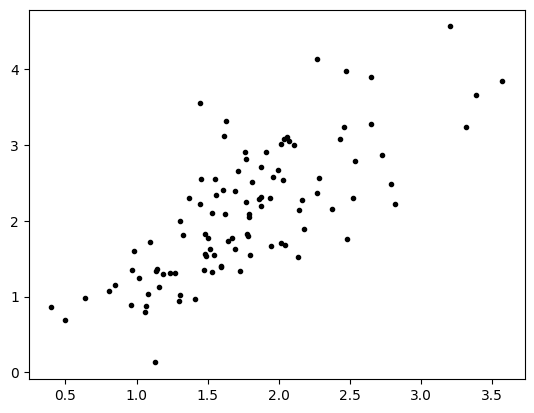

In [29]:
corr_without_outlier = corr_frame.drop(ind)
x = corr_without_outlier['par_1']
y = corr_without_outlier['par_2']
corr =  np.corrcoef(x, y)[0,1]
print(corr)
print(param)
plt.plot(x, y, '.', color='black')
plt.show()

v1_mean 0.747*** 0.0
Index([258, 372], dtype='int64')
v2_mean 0.772*** 0.0
Index([209], dtype='int64')


/tmp/ipykernel_262837/2053567891.py:70: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
/tmp/ipykernel_262837/2053567891.py:70: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


a_mean 0.629*** 0.0
Index([409, 64], dtype='int64')
ndt_mean 0.492*** 0.0
Index([409, 223], dtype='int64')


/tmp/ipykernel_262837/2053567891.py:70: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
/tmp/ipykernel_262837/2053567891.py:70: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


alpha_mean 0.45*** 0.0
Index([409], dtype='int64')
v_total = v2 - v1 0.784*** 0.0
Index([258], dtype='int64')


/tmp/ipykernel_262837/2053567891.py:70: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
/tmp/ipykernel_262837/2053567891.py:70: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


v_bias = v2 + v1 0.563*** 0.0
Index([], dtype='int64')


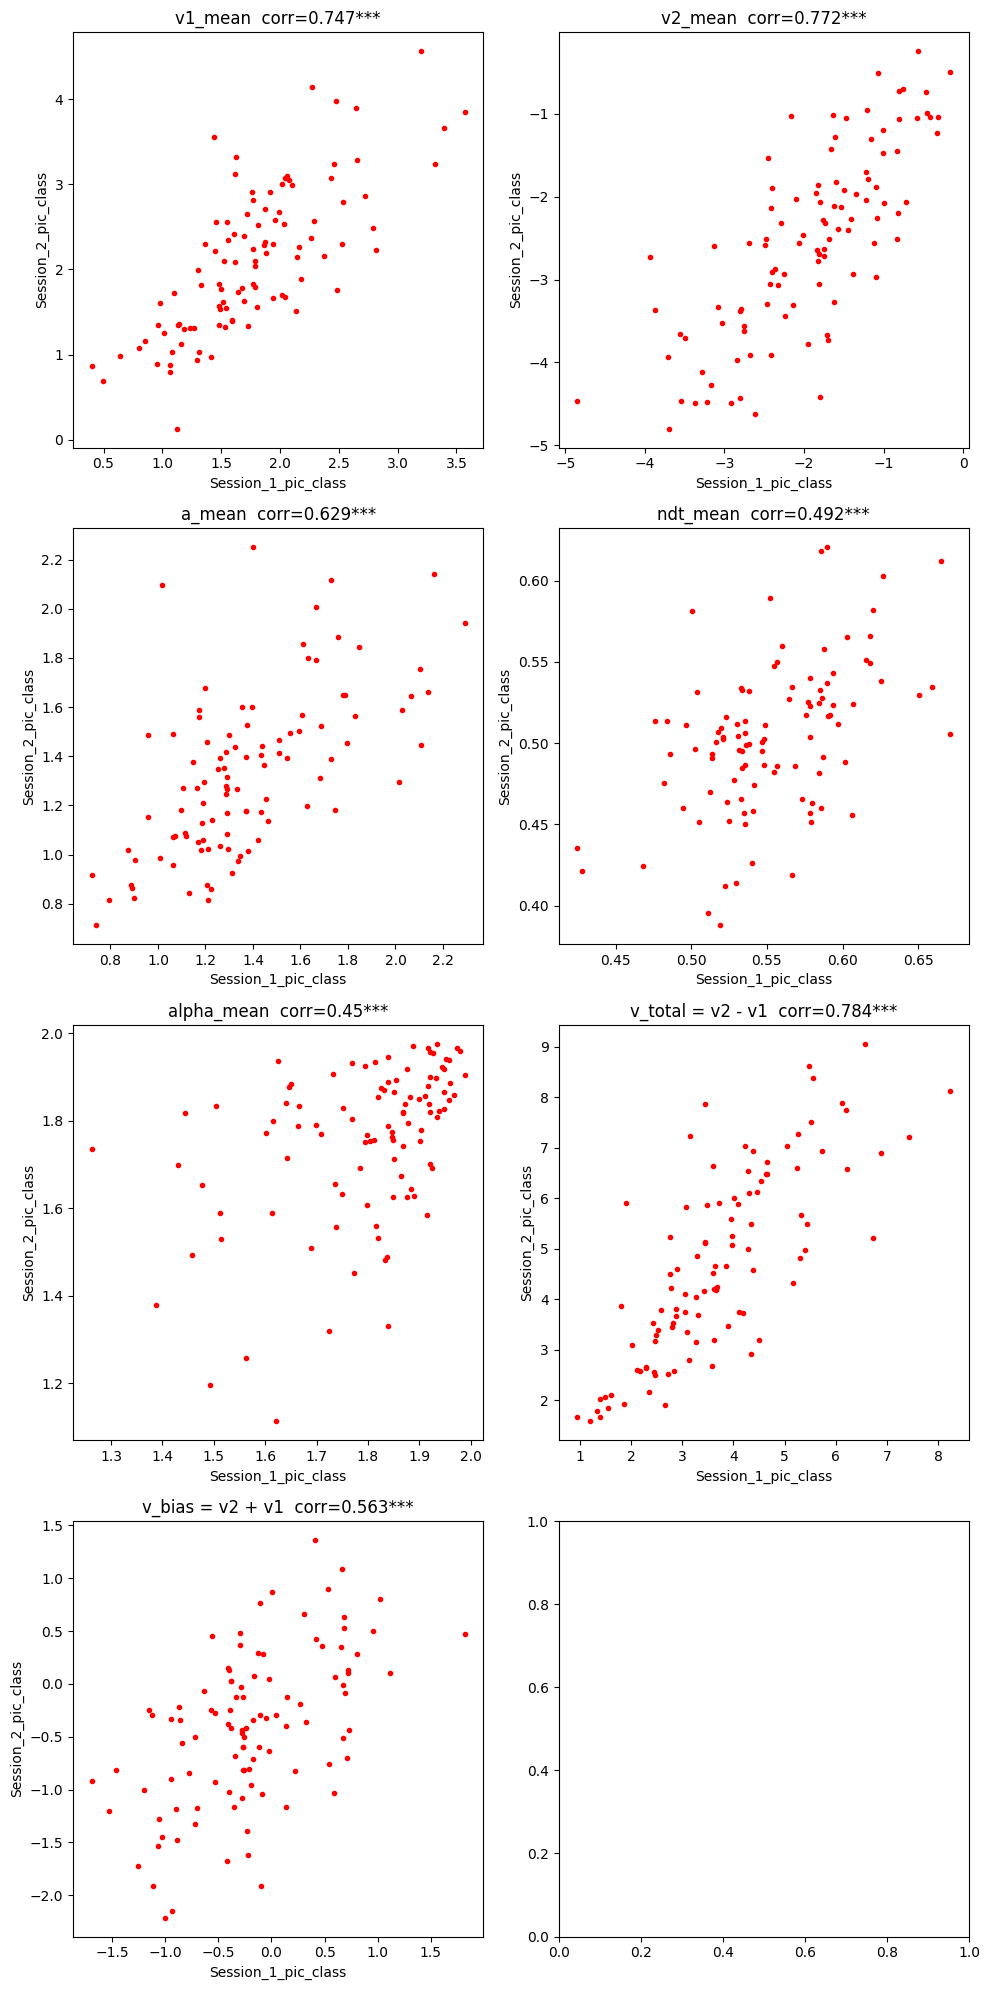

In [33]:
params_mean=['v1_mean','v2_mean','a_mean','ndt_mean','alpha_mean','v_total = v2 - v1','v_bias = v2 + v1']
#corr_frame = pd.DataFrame()
#corr_frame['Experiment']=df_word_part_1['Experiment']
final_corr_frame = pd.DataFrame()
final_corr_frame['Experiment']=['class_pictures']
final_corr_frame['corr_type']=['between session']

final_corr_dict = {}
from scipy.stats import chi2
chi2.ppf((1-0.001), df=2)

fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(10, 20))
axs = axs.flatten()
a=0    
for param in params_mean:
    corr_frame = pd.DataFrame()
    par_1='param_1_'+str(param)
    par_2='param_2_'+str(param)
    data_analysis = {'Experiment':df_class_pictures_1['Experiment'],par_1:np.array(df_class_pictures_1[param]),par_2:np.array(df_class_pictures_2[param])}
    corr_frame = pd.DataFrame(data_analysis)    
    df_x = corr_frame[[par_1, par_2]]
    df_x['mahala'] = mahalanobis(x=df_x, data=corr_frame[[par_1, par_2]])
    df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Extreme values with a significance level of 0.01
    df_outliers=df_x.loc[df_x.p_value < 0.001]
    ind=df_outliers.index
#drop the outliers with index     
    corr_without_outlier = corr_frame.drop(ind)
    x = corr_without_outlier[par_1]
    y = corr_without_outlier[par_2]
    #corr =  np.corrcoef(x, y)[0,1]
    #corr =round(corr,3)
    corrcoef_pval =pearsonr(x,y)
    corr = corrcoef_pval[0]
    corr =round(corr,3)
    pvalue=corrcoef_pval[1]
    pvalue =round(pvalue,5)
    #make significance by star ***
    if pvalue < 0.001 :
        corr = str(corr)+'***'
    elif pvalue < 0.01 :
        corr = str(corr)+'**'
    elif pvalue < 0.05 :
        corr = str(corr)+'*'
        
    print(param,corr,pvalue)
    print(ind)
  

    #plt.plot(x, y, '.', color='red')
    #plt.show()
    
    axs[a].plot(x, y,'.',color='red')
    axs[a].set_title(param+'  corr='+str(corr))
    axs[a].set_xlabel('Session_1_pic_class')
    axs[a].set_ylabel('Session_2_pic_class')
    
    
    #ax.set_xlabel(param)
    #axs[a].set_xlabel(param)
    
    a+=1
    #plt.title('corr ='+str(corr))
    #plt.xlabel('Session_1_pic_class')
    #plt.ylabel('Session_2_pic_class')
    #plt.savefig("./{}.png".format(param))
    #plt.show()
    #f.savefig("./{}.png".format(param), dpi=600, bbox_inches='tight')
    fig.tight_layout()
    #f.savefig("./{}.png".format(param), dpi=600, bbox_inches='tight')

    final_corr_frame['corr_'+str(param)] = [corr]

#saving the results 
fig.savefig("./EZ_Study1_Picture_s1s2_corr_.png", dpi=600, bbox_inches='tight')

final_corr_frame.to_csv('corr_between_session_class_pictures.csv',index=False)
 
    


In [32]:
final_corr_frame.to_excel("EZ_between_s1s2_picture.xlsx")

final_corr_frame

,Experiment,corr_type,corr_v1_mean,corr_v2_mean,corr_a_mean,corr_ndt_mean,corr_alpha_mean,corr_v_total = v2 - v1,corr_v_bias = v2 + v1
0,class_pictures,between session,0.747***,0.772***,0.629***,0.492***,0.45***,0.784***,0.563***
